In [37]:
import pandas as pd
import seaborn as sb

In [65]:
df = sb.load_dataset("diamonds")

In [66]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [67]:
df.shape

(53940, 10)

In [68]:
df = df[df.carat < 0.5]

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17674 entries, 0 to 53639
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    17674 non-null  float64 
 1   cut      17674 non-null  category
 2   color    17674 non-null  category
 3   clarity  17674 non-null  category
 4   depth    17674 non-null  float64 
 5   table    17674 non-null  float64 
 6   price    17674 non-null  int64   
 7   x        17674 non-null  float64 
 8   y        17674 non-null  float64 
 9   z        17674 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 1.1 MB


<AxesSubplot:ylabel='Frequency'>

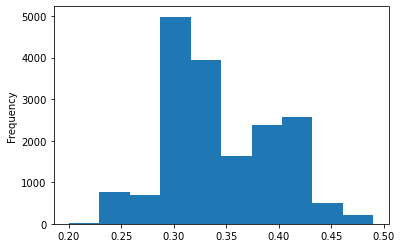

In [70]:
df.carat.plot.hist()

In [71]:
df.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

In [72]:
X = df[['carat','depth','table','x','y','z']]

In [73]:
X.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [74]:
y = df['price']

In [75]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 101)

In [78]:
import sklearn.linear_model as lin

In [79]:
model = lin.LinearRegression()

In [80]:
# בוא תלמד את המקדמים של איקס ו-ווי
model.fit(X_train,y_train)

LinearRegression()

In [81]:
pred = model.predict(X_test)

In [82]:
X_test.head(2)

,carat,depth,table,x,y,z
35028,0.40,63.7,57.0,4.69,4.66,2.98
27793,0.37,62.8,60.0,4.55,4.59,2.87


In [83]:
pred

array([931.71647624, 740.81776973, 637.75567518, ..., 905.40094136,
       599.36259514, 881.97119831])

In [84]:
y_test[:2]

35028    882
27793    649
Name: price, dtype: int64

In [85]:
import matplotlib.pyplot as plt

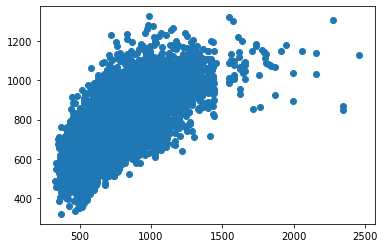

In [86]:
plt.scatter(y_test,pred)

In [87]:
model.score(X_test,y_test)

0.44008350927897244

In [88]:
df.describe()

,carat,depth,table,price,x,y,z
count,17674.000000,17674.000000,17674.000000,17674.000000,17674.000000,17674.000000,17674.000000
mean,0.344492,61.695496,56.950045,792.403248,4.495727,4.505229,2.776045
std,0.053888,1.137483,2.050325,245.176457,0.239135,0.237021,0.147794
min,0.200000,51.000000,44.000000,326.000000,3.730000,3.680000,2.060000
25%,0.310000,61.100000,55.000000,608.000000,4.330000,4.340000,2.680000
50%,0.330000,61.800000,57.000000,765.000000,4.450000,4.460000,2.750000
75%,0.400000,62.400000,58.000000,943.000000,4.700000,4.710000,2.900000
max,0.490000,68.600000,68.000000,2677.000000,6.650000,6.020000,4.440000


In [89]:
df2 = pd.get_dummies(df, columns=['color','cut','clarity'])

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17674 entries, 0 to 53639
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    17674 non-null  float64 
 1   cut      17674 non-null  category
 2   color    17674 non-null  category
 3   clarity  17674 non-null  category
 4   depth    17674 non-null  float64 
 5   table    17674 non-null  float64 
 6   price    17674 non-null  int64   
 7   x        17674 non-null  float64 
 8   y        17674 non-null  float64 
 9   z        17674 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 1.1 MB


In [91]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17674 entries, 0 to 53639
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          17674 non-null  float64
 1   depth          17674 non-null  float64
 2   table          17674 non-null  float64
 3   price          17674 non-null  int64  
 4   x              17674 non-null  float64
 5   y              17674 non-null  float64
 6   z              17674 non-null  float64
 7   color_D        17674 non-null  uint8  
 8   color_E        17674 non-null  uint8  
 9   color_F        17674 non-null  uint8  
 10  color_G        17674 non-null  uint8  
 11  color_H        17674 non-null  uint8  
 12  color_I        17674 non-null  uint8  
 13  color_J        17674 non-null  uint8  
 14  cut_Ideal      17674 non-null  uint8  
 15  cut_Premium    17674 non-null  uint8  
 16  cut_Very Good  17674 non-null  uint8  
 17  cut_Good       17674 non-null  uint8  
 18  cut_Fa

In [92]:
X = df2.drop('price',axis=1)

In [95]:
y = df2['price']

In [94]:
df2.head(1)

,carat,depth,table,price,x,y,z,color_D,color_E,color_F,...,cut_Good,cut_Fair,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [96]:
from sklearn import metrics

In [97]:
metrics.mean_absolute_error(y_test, pred)

142.99736779716002

In [98]:
import numpy as np

In [99]:
np.sqrt(metrics.mean_squared_error(y_test, pred))

183.50322191307774

In [100]:
model.intercept_

6121.222858114999

In [101]:
model.coef_

array([ 3138.72287438,   -81.88246369,   -16.16995222,   842.60597827,
       -1579.94871789,  1041.39049301])

In [107]:
m2 = lin.LinearRegression()

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [109]:
m2.fit(X_train,y_train)

LinearRegression()

In [110]:
m2.score(X_test,y_test)

0.8413377551545046

In [111]:
pred = m2.predict(X_test)

In [112]:
metrics.mean_absolute_error(y_test, pred)

67.38588488960455

In [113]:
np.sqrt(metrics.mean_squared_error(y_test, pred))

97.68297141962688